# Assignment :  Advanced Regression
##### Submitted by:
     SAIBEK VARGHESE PANICKER

### Problem Statement
#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
#### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
#### The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',85)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [2]:
df=pd.read_csv('train.csv')
df.shape

(1460, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing value treatment

<AxesSubplot:>

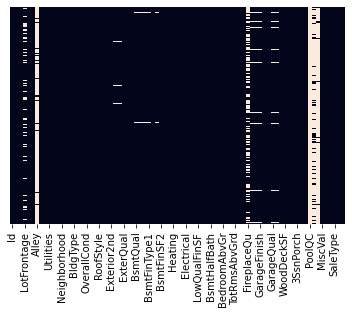

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [5]:
a=df.isnull().sum()

In [6]:
print(a[a>10])

LotFrontage      259
Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
null=df.isnull().mean()*100

In [8]:
print(null[null>50])

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [9]:
df.shape

(1460, 81)

In [10]:
#dropping cols with more than 50% null values
df=df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)

In [11]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [12]:
obj=list(df.select_dtypes(exclude='number'))
obj

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [13]:
def fill(f):# function to fill all the nan values
    for i in df.select_dtypes(include='number'):
        f[i].fillna(f[i].median(),inplace=True) # fill numerical with median
    for j in df.select_dtypes(exclude='number'):
        f[j].fillna(f[j].mode()[0],inplace=True)#fill categorical with mode
fill(df)
df.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

### Distribution plotting

#### Categorical

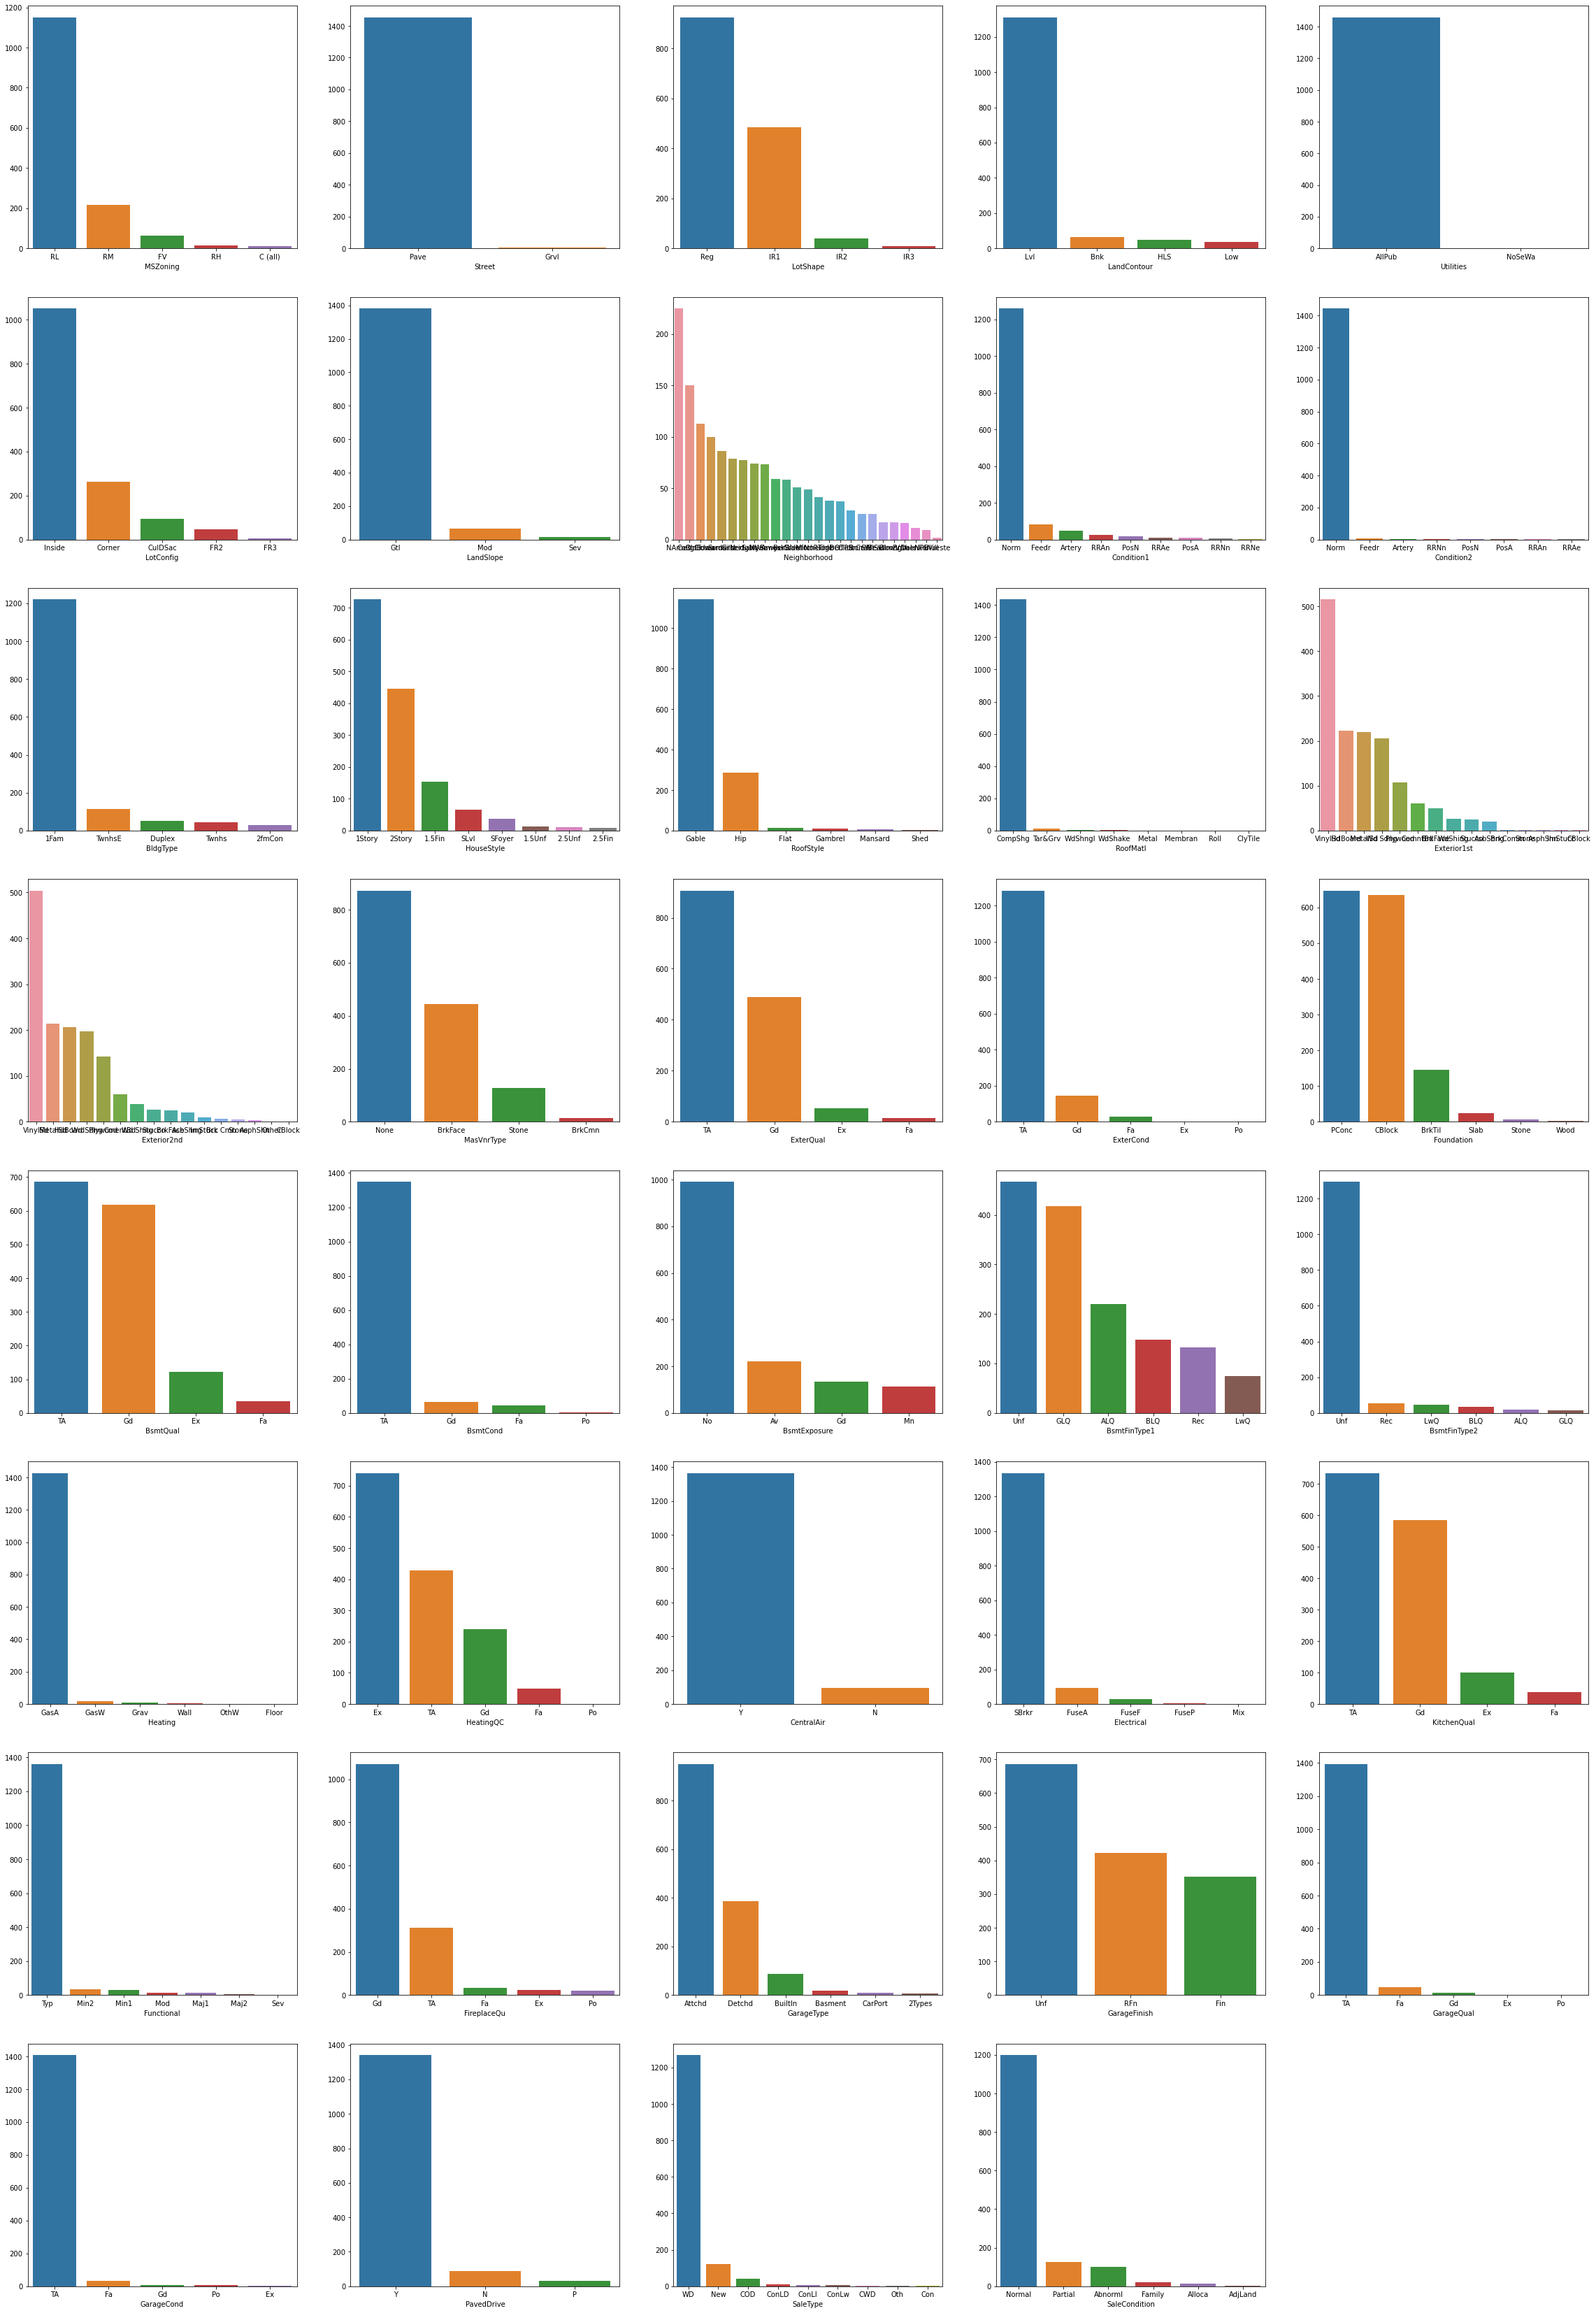

In [14]:
plt.figure(figsize=(40,60), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(exclude='number'):
    if plotnumber<=50 :     
        ax = plt.subplot(8,5,plotnumber)
        value_counts = df[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()


#### It is observed that many categorical features have majority one value.

In [15]:
for i in obj:
    #print(i)
    a=(df[i].value_counts()/df.shape[0]*100)
    
    
    selected_values = a[a > 80]
    if not selected_values.empty:
        print(i)
        print(selected_values)
        print()

Street
Pave    99.589041
Name: Street, dtype: float64

LandContour
Lvl    89.794521
Name: LandContour, dtype: float64

Utilities
AllPub    99.931507
Name: Utilities, dtype: float64

LandSlope
Gtl    94.657534
Name: LandSlope, dtype: float64

Condition1
Norm    86.30137
Name: Condition1, dtype: float64

Condition2
Norm    98.972603
Name: Condition2, dtype: float64

BldgType
1Fam    83.561644
Name: BldgType, dtype: float64

RoofMatl
CompShg    98.219178
Name: RoofMatl, dtype: float64

ExterCond
TA    87.808219
Name: ExterCond, dtype: float64

BsmtCond
TA    92.328767
Name: BsmtCond, dtype: float64

BsmtFinType2
Unf    88.630137
Name: BsmtFinType2, dtype: float64

Heating
GasA    97.808219
Name: Heating, dtype: float64

CentralAir
Y    93.493151
Name: CentralAir, dtype: float64

Electrical
SBrkr    91.438356
Name: Electrical, dtype: float64

Functional
Typ    93.150685
Name: Functional, dtype: float64

GarageQual
TA    95.342466
Name: GarageQual, dtype: float64

GarageCond
TA    96.369863

In [16]:
#dropping columns with more than 80% same value


In [17]:
df.drop(['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond','Heating','BsmtFinType2','BsmtCond','GarageQual','Functional','Electrical','CentralAir','SaleCondition','SaleType','GarageQual','PavedDrive','GarageCond'],axis=1,inplace=True)

In [18]:
df.shape

(1460, 57)

In [19]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Numerical

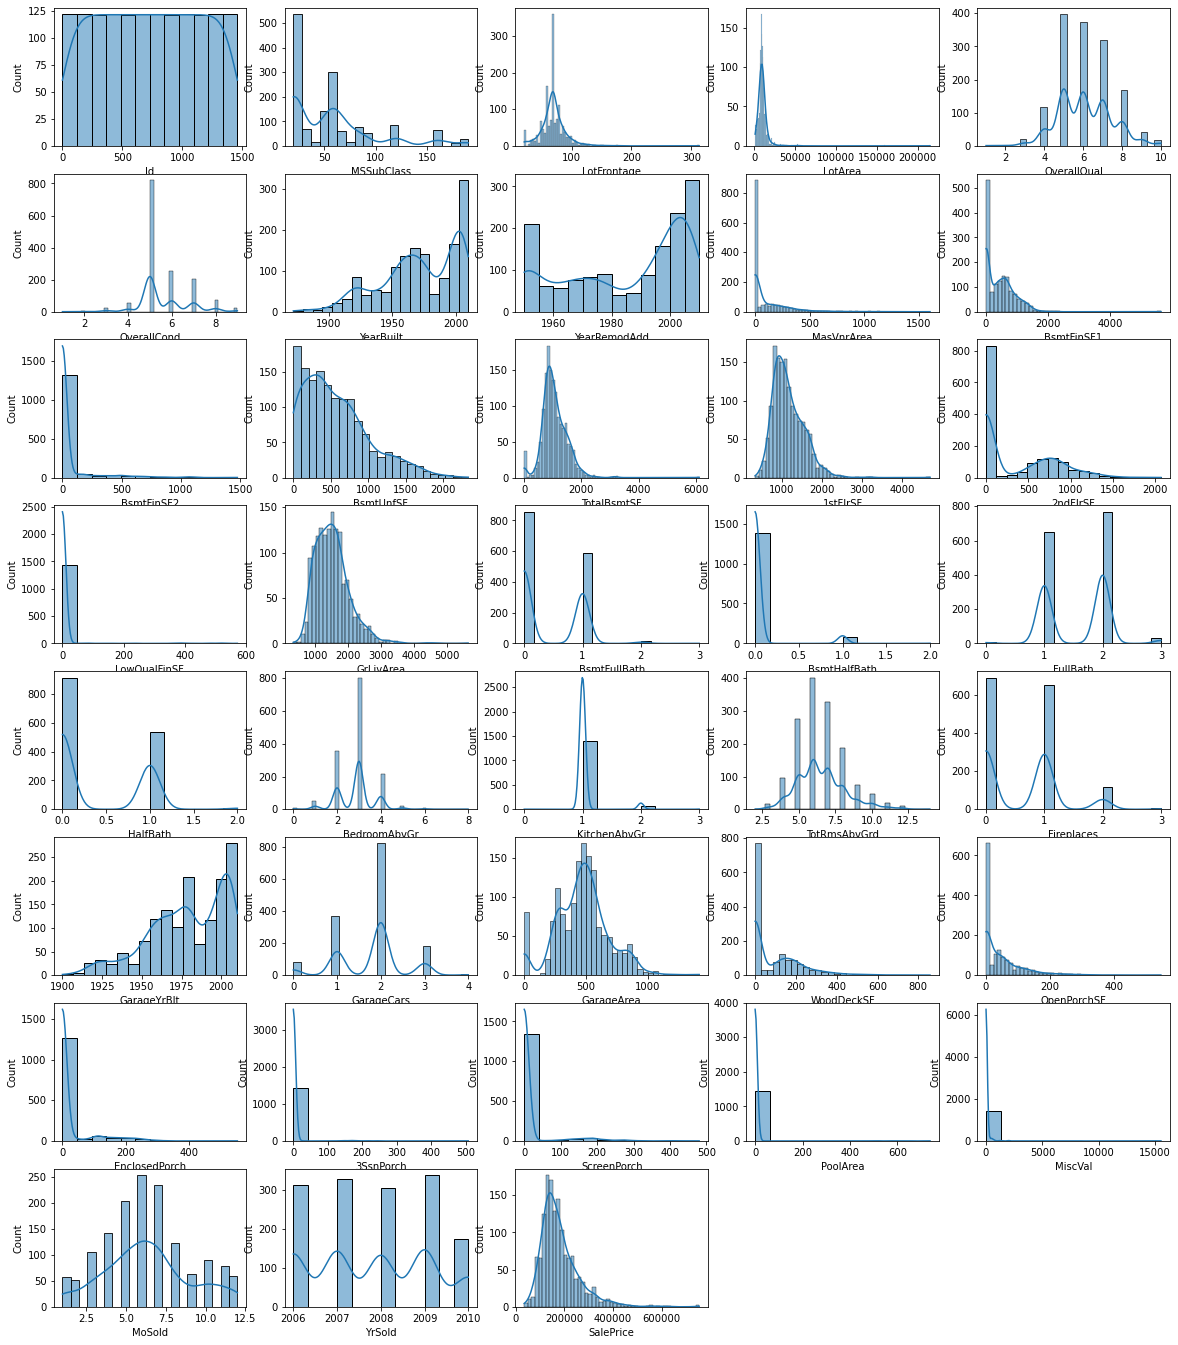

In [20]:
#check numerical distribuitions
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber<=50 :     
        ax = plt.subplot(10,5,plotnumber)
        sns.histplot(df[column], kde = True)
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()


In [21]:
for i in df.select_dtypes(include='number'):
    #print(i)
    a=(df[i].value_counts()/df.shape[0]*100)
    
    
    selected_values = a[a > 80]
    if not selected_values.empty:
        print(i)
        print(selected_values)
        print()

BsmtFinSF2
0    88.561644
Name: BsmtFinSF2, dtype: float64

LowQualFinSF
0    98.219178
Name: LowQualFinSF, dtype: float64

BsmtHalfBath
0    94.383562
Name: BsmtHalfBath, dtype: float64

KitchenAbvGr
1    95.342466
Name: KitchenAbvGr, dtype: float64

EnclosedPorch
0    85.753425
Name: EnclosedPorch, dtype: float64

3SsnPorch
0    98.356164
Name: 3SsnPorch, dtype: float64

ScreenPorch
0    92.054795
Name: ScreenPorch, dtype: float64

PoolArea
0    99.520548
Name: PoolArea, dtype: float64

MiscVal
0    96.438356
Name: MiscVal, dtype: float64



In [22]:
df=df.drop(['Id','BsmtFinSF2',
'LowQualFinSF',
'BsmtHalfBath',
'KitchenAbvGr',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal'],axis=1)

In [23]:
df.shape

(1460, 47)

In [24]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### EDA

### Boxplot

In [25]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
for column in df.select_dtypes(include='number'):
    print(column)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
MoSold
YrSold
SalePrice


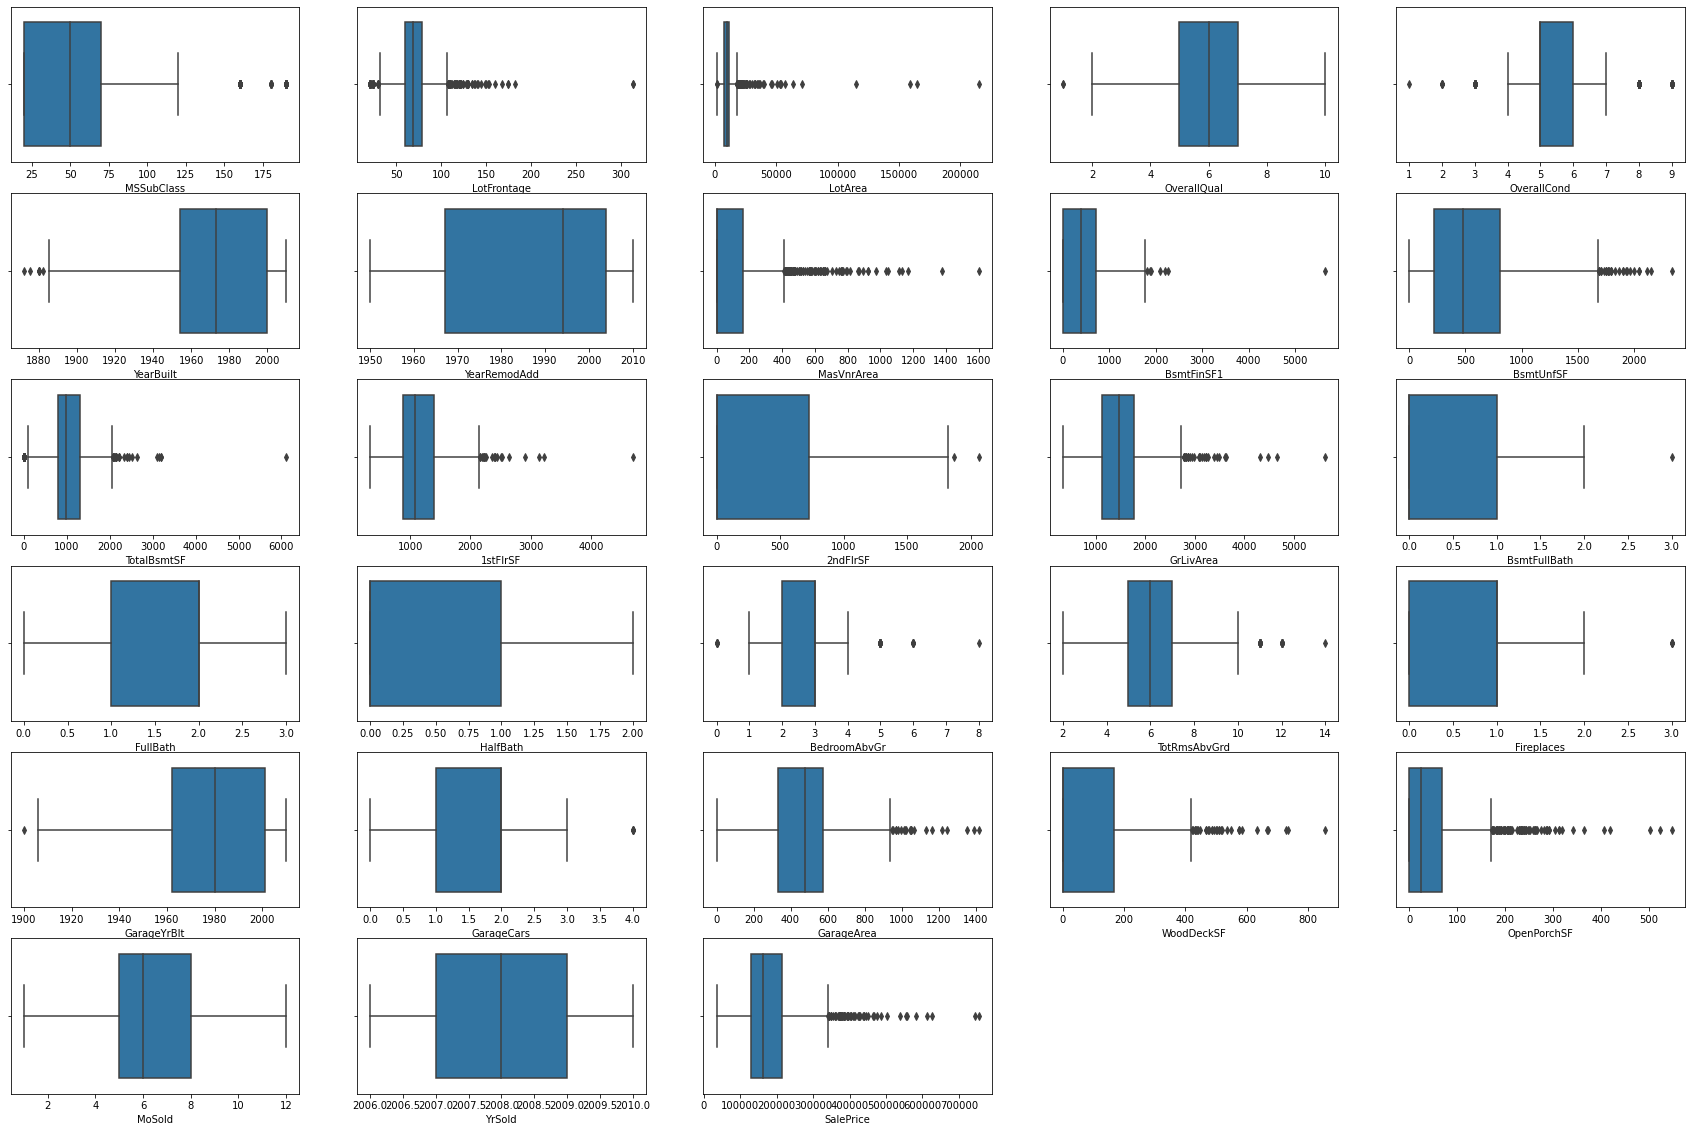

In [27]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,20), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber<=50 :     
        ax = plt.subplot(6,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [28]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
df.shape

(1460, 47)

In [30]:
#dropping the outliers beyond 95 percentile and below 25 percentile
def drop_outliers(x):
    list = []
    outl_col = ['LotFrontage', 'LotArea','OverallCond','BsmtUnfSF','BsmtFinSF1','MasVnrArea','TotalBsmtSF','OpenPorchSF','WoodDeckSF']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.97)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(1444, 47)

### Distribution

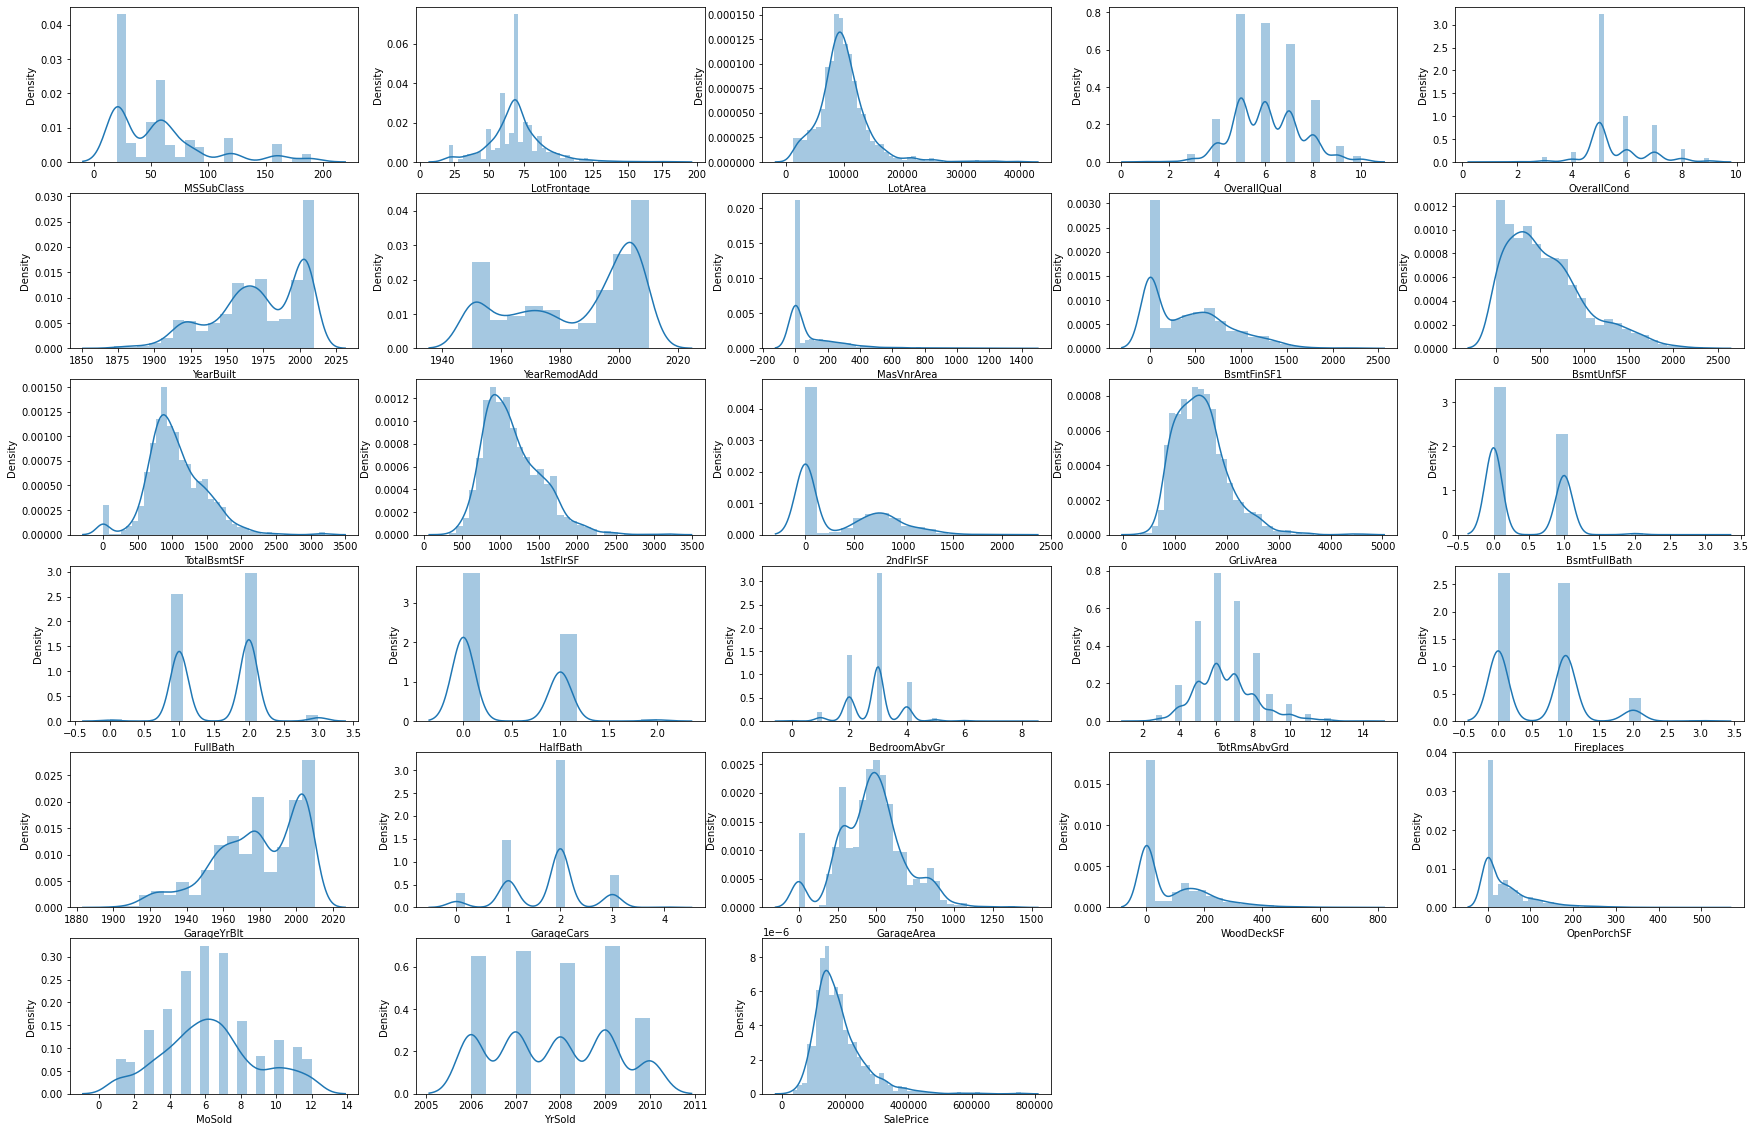

In [31]:
plt.figure(figsize=(30,20), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber<=50 :     
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(df[column],kde=True)
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

In [32]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [33]:
#Converting numerical cols to categorical where required
df['YrSold']=df['YrSold'].astype('category')
df['MoSold']=df['MoSold'].astype('category')
df['GarageCars']=df['GarageCars'].astype('category')
df['Fireplaces']=df['Fireplaces'].astype('category')
df['HalfBath']=df['HalfBath'].astype('category')
df['BsmtFullBath']=df['BsmtFullBath'].astype('category')
df['OverallQual']=df['OverallQual'].astype('category')
df['FullBath']=df['FullBath'].astype('category')


### Countplot

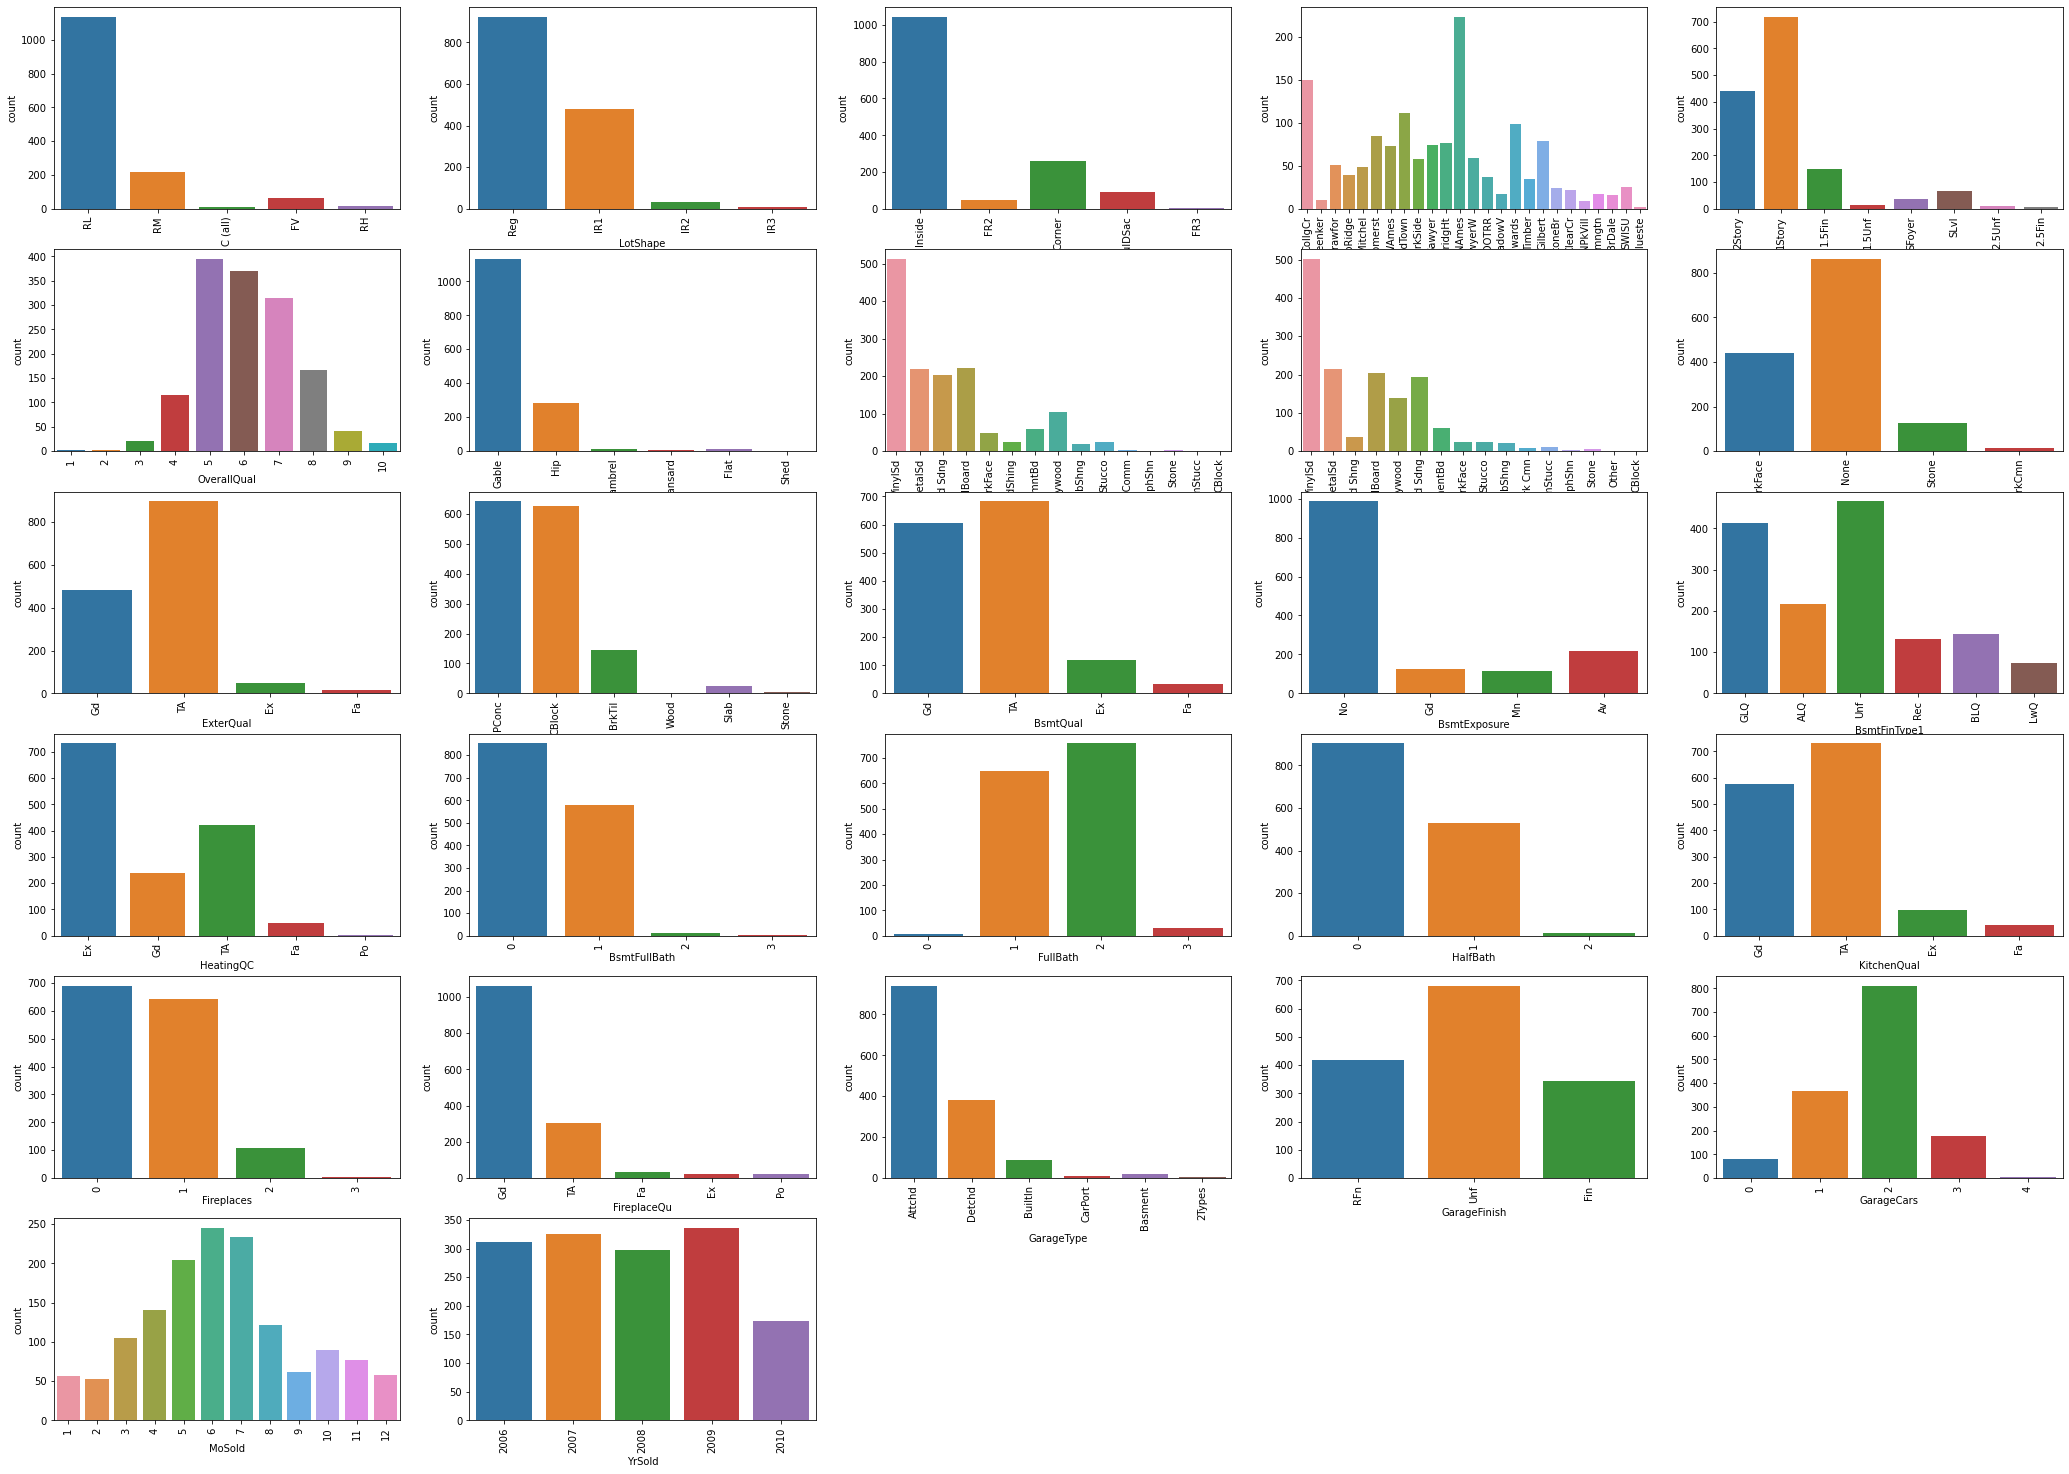

In [34]:
plt.figure(figsize=(36,26), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(exclude='number'):
    if plotnumber<=29 :     # as there are 9 columns in the data
        ax = plt.subplot(6,5,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation = 90)
        
    plotnumber+=1
plt.show()

### EDA with target variable (Bivariate analysis)

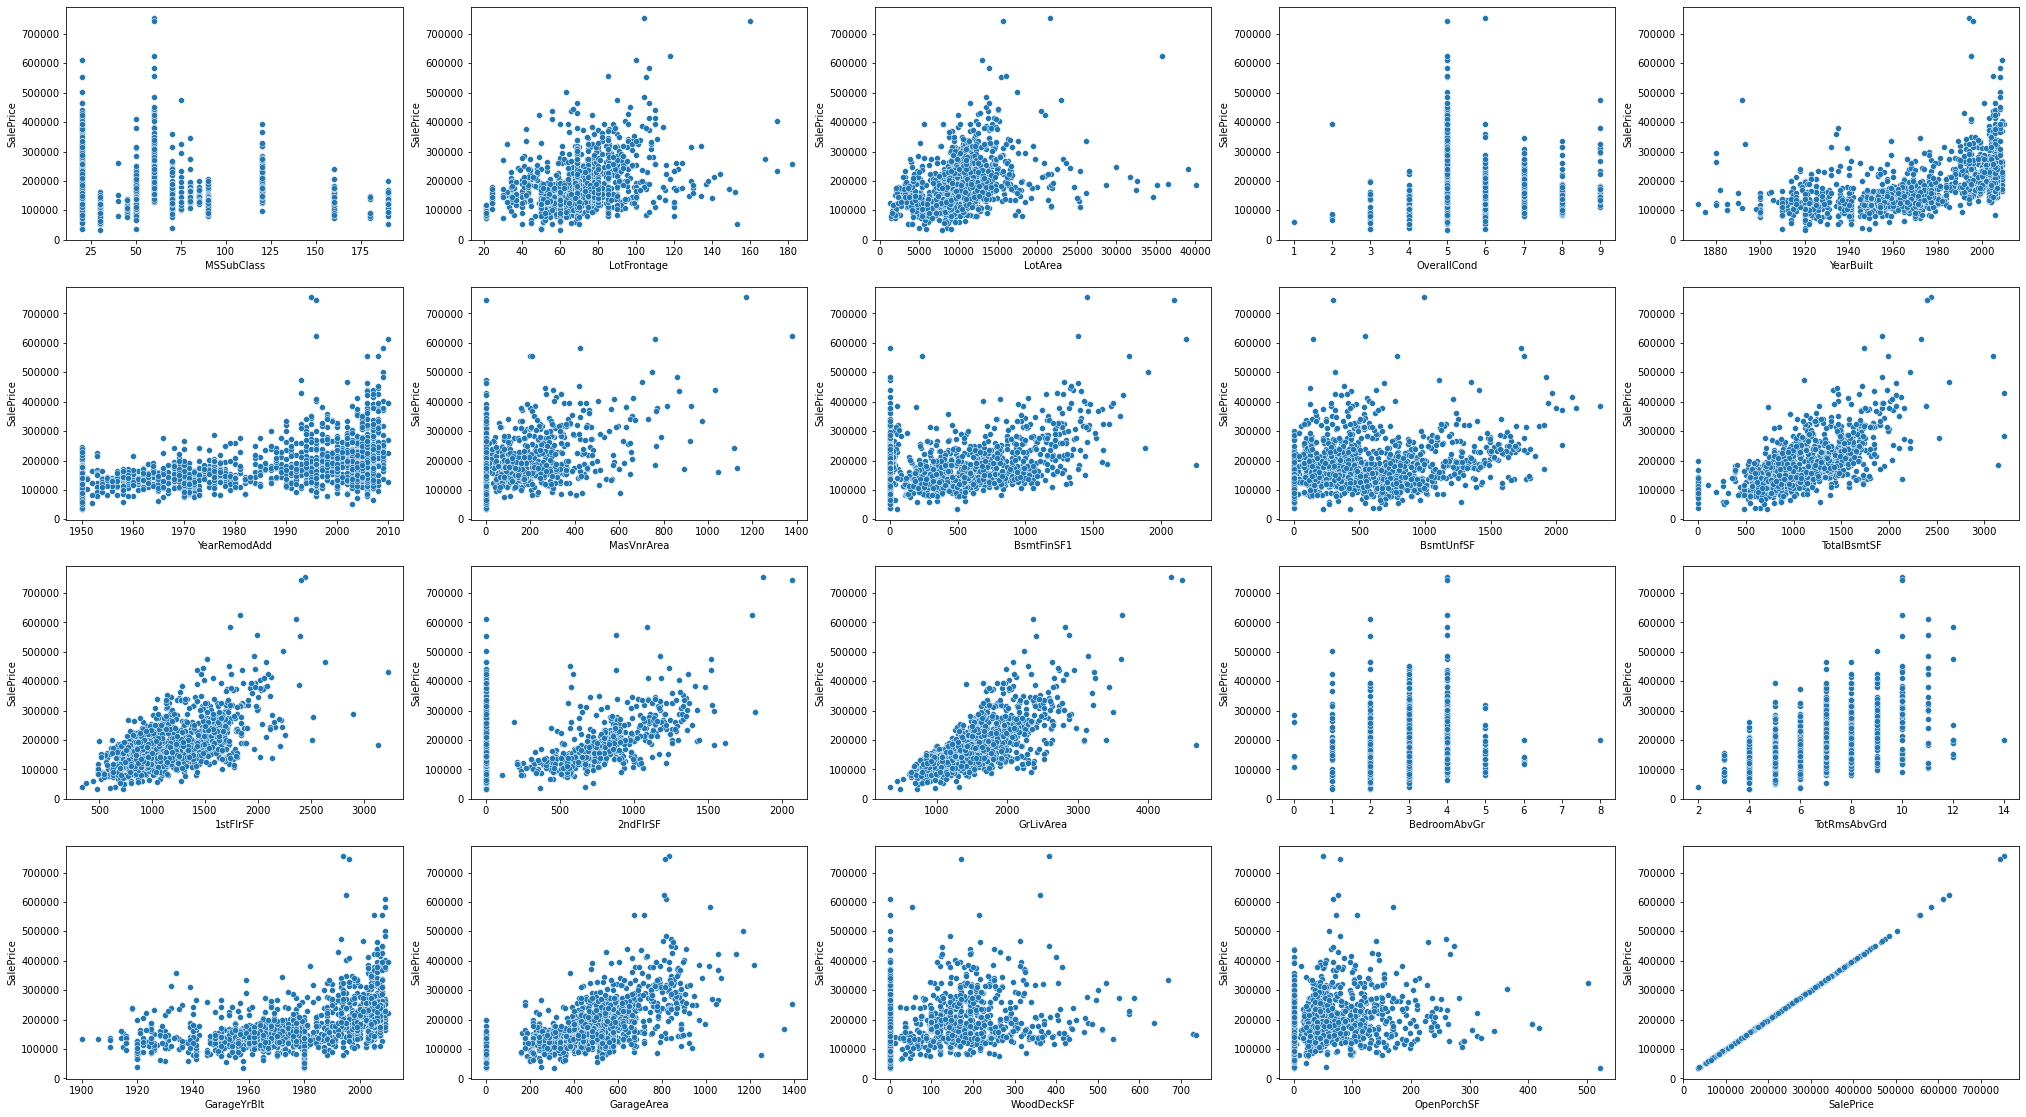

In [35]:
plt.figure(figsize=(35,30), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):
    if plotnumber<=40:     
        ax = plt.subplot(6,5,plotnumber)
        sns.scatterplot(x=df[column],y=df['SalePrice'])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

### OBSERVATIONS
* Gr liv area has a good linear relation .
* lot area , lot frontage,1stFlrSF and 2ndFlrSF have a slight linear relation


### Corelation Plot

<AxesSubplot:>

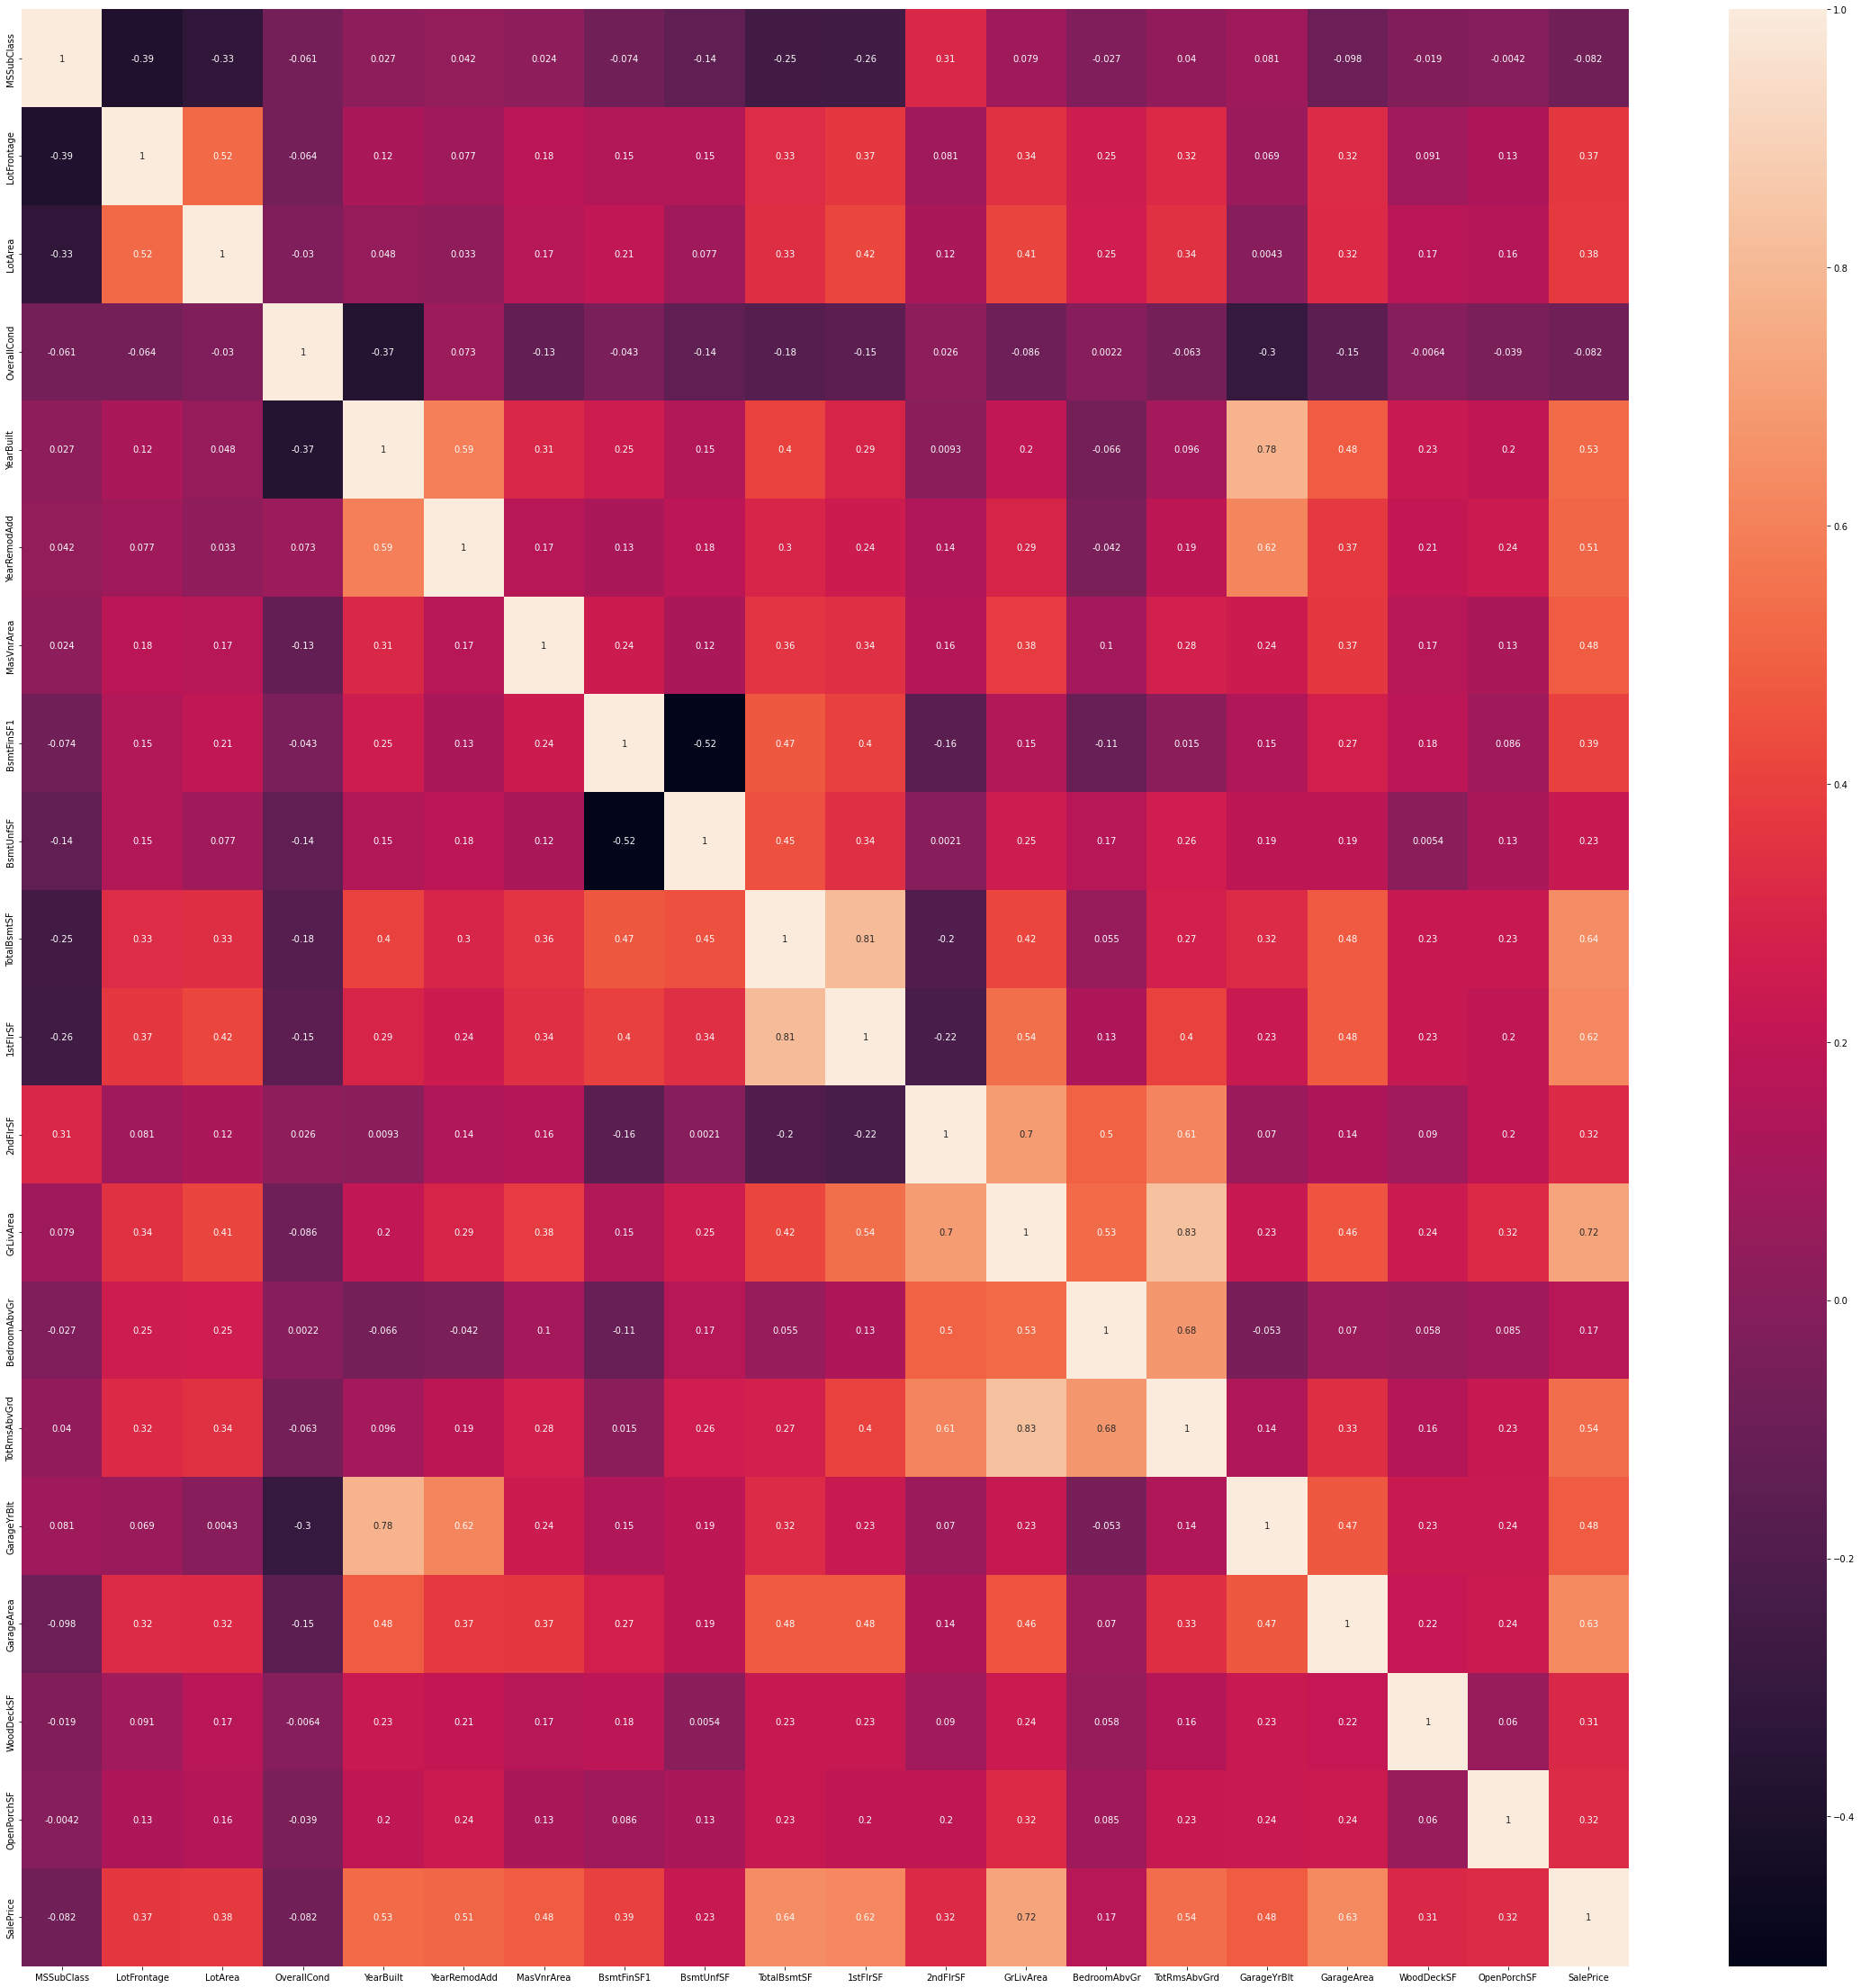

In [36]:
fig = plt.figure()

fig.set_figheight(40)
fig.set_figwidth(40)
x=df.corr()
sns.heatmap(x,annot=True)

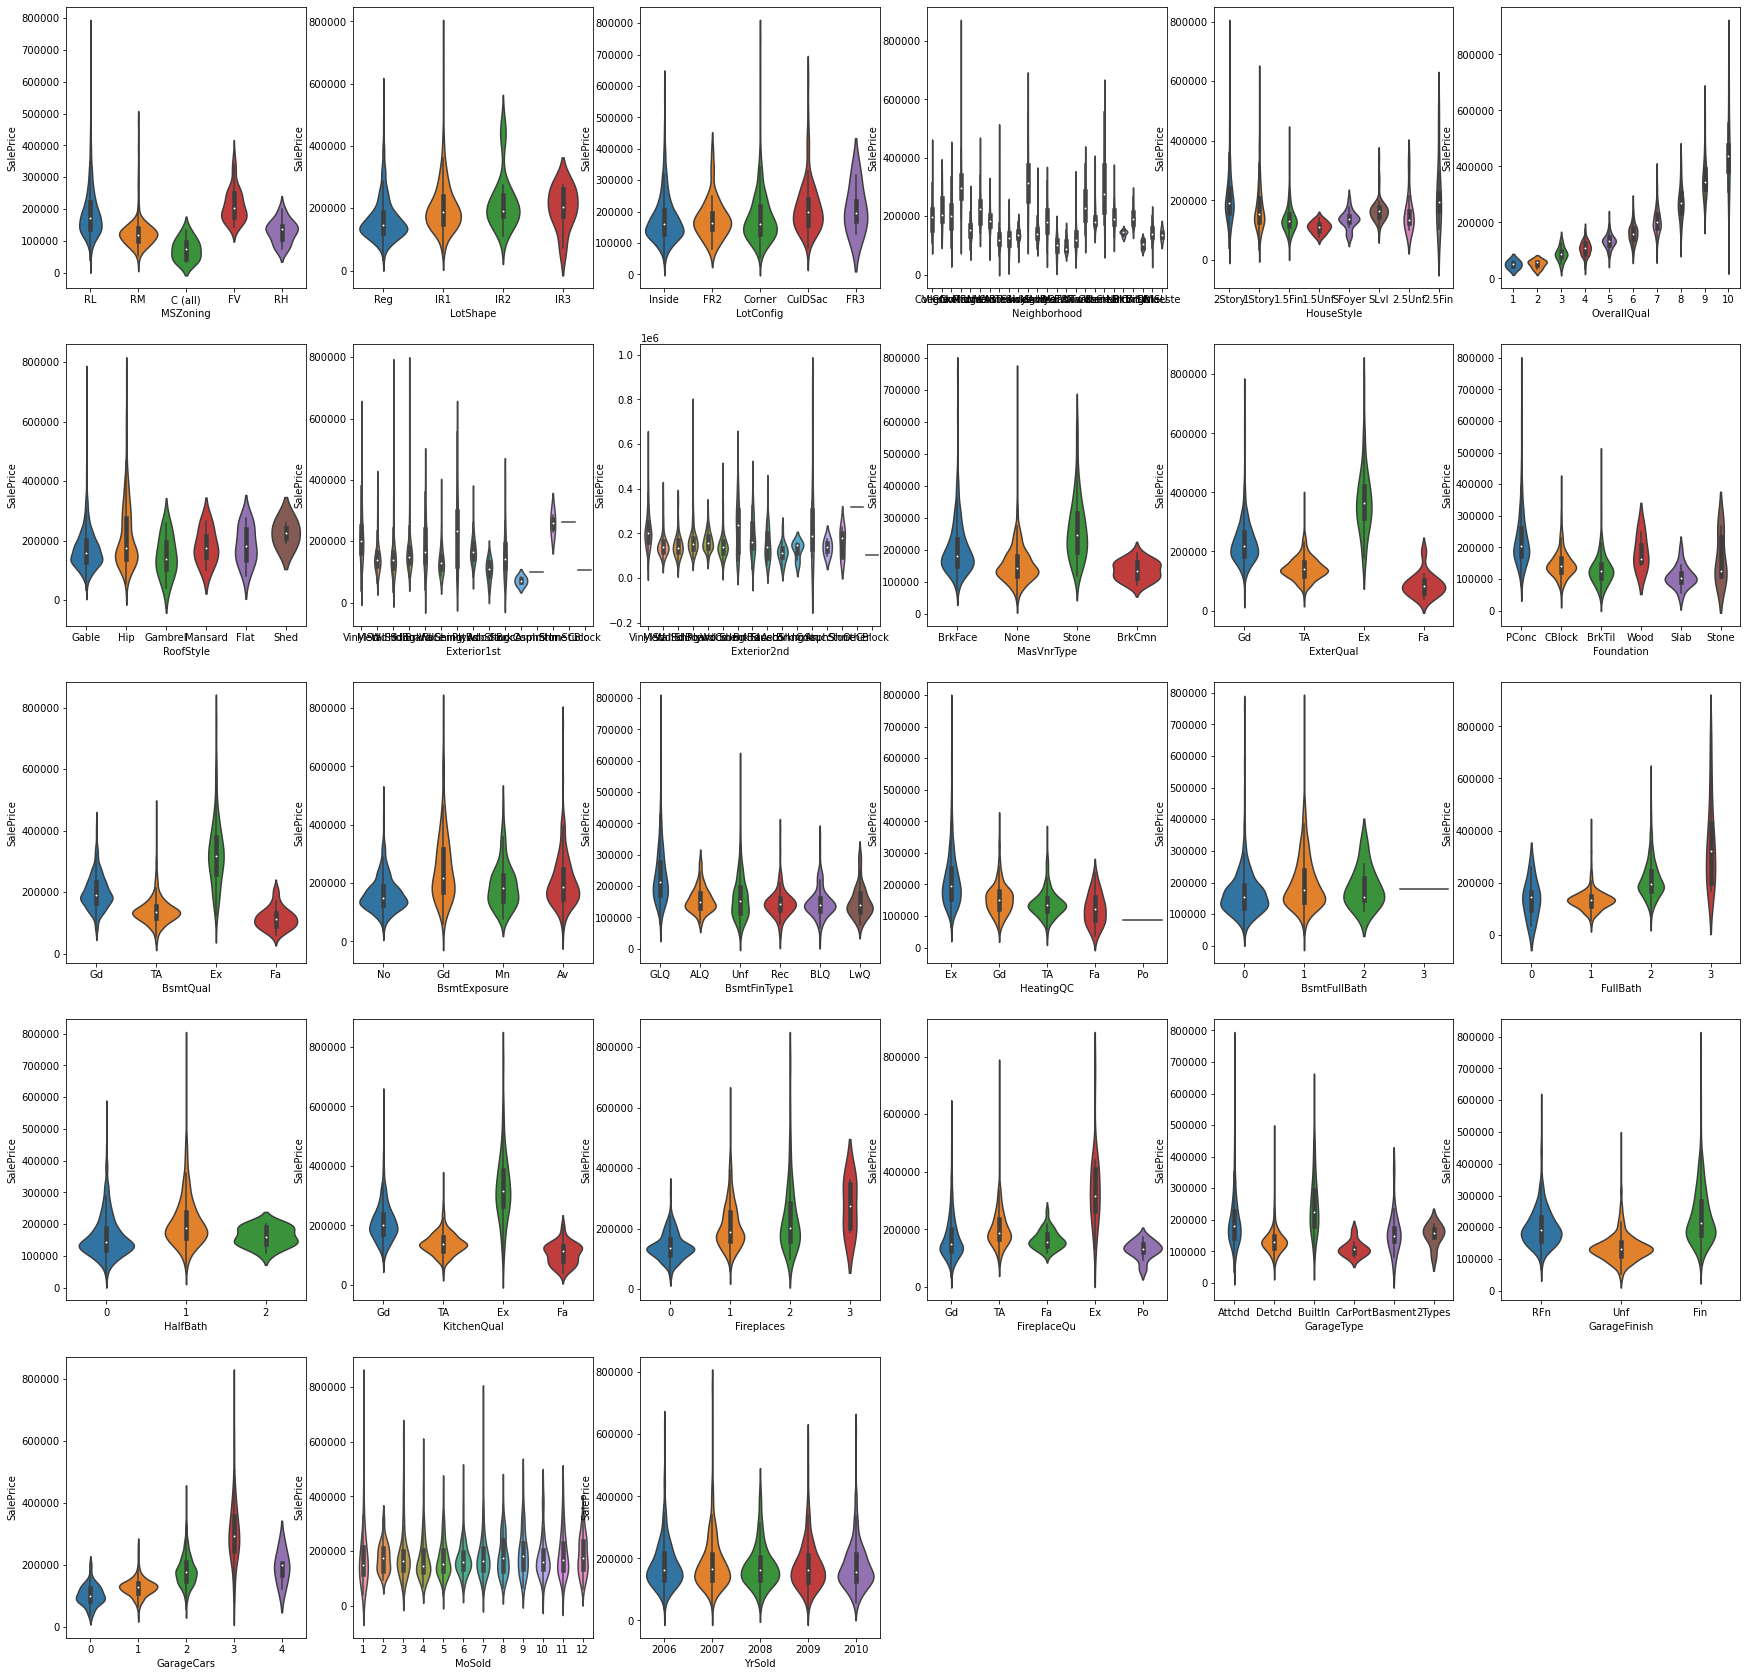

In [37]:
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(exclude='number'):
    if plotnumber<=50 :     
        ax = plt.subplot(5,6,plotnumber)
        sns.violinplot(x=df[column],y=df['SalePrice'])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

#### The sales price incresease when : 
* exterior quality : ex
* heating qc : ex
* bsmnt fintyp: glq
* kitchen quality : ex
* fireplace : ex


## Encoding

In [38]:
list_obj=list(df.select_dtypes(exclude='number').columns)
list_obj

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'MoSold',
 'YrSold']

In [39]:
#using dummy variable
dummy=pd.get_dummies(df[list_obj],prefix=list_obj,drop_first=True)
dummy

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,...,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1456,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1457,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1458,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Gd,Attchd,2003.0,RFn,2,548,0,61,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,0,953,953,Ex,953,694,1647,0,2,1,3,TA,7,1,TA,Attchd,1999.0,RFn,2,460,0,40,8,2007,175000
1456,20,RL,85.0,13175,Reg,Inside,NWAmes,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,790,589,1542,TA,2073,0,2073,1,2,0,3,TA,7,2,TA,Attchd,1978.0,Unf,2,500,349,0,2,2010,210000
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,275,877,1152,Ex,1188,1152,2340,0,2,0,4,Gd,9,2,Gd,Attchd,1941.0,RFn,1,252,0,60,5,2010,266500
1458,20,RL,68.0,9717,Reg,Inside,NAmes,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,49,0,1078,Gd,1078,0,1078,1,1,0,2,Gd,5,0,Gd,Attchd,1950.0,Unf,1,240,366,0,4,2010,142125


In [41]:
df=pd.concat([df,dummy],axis=1)
df=df.drop(list_obj,axis=1)
df.shape

(1444, 175)

### Modeling

In [42]:
#splitting
df_train,df_test=train_test_split(df,test_size=0.2,random_state=10)

#### scaling

In [43]:
num=list(df.select_dtypes(include='number'))
scalar=MinMaxScaler()
df_train[num]=scalar.fit_transform(df_train[num])
df_test[num]=scalar.transform(df_test[num])


#### Initializing

In [44]:
Y_train =df_train[['SalePrice']]
X_train =df_train.drop(['SalePrice'],1)

In [45]:
Y_test =df_test[['SalePrice']]
X_test =df_test.drop(['SalePrice'],1)

#### Making a fn for modeling and returning the evaluation metrics 

In [46]:
def metrics(X_train,X_test,Y_train,Y_test,model):
    model=model
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_train=y_pred_train.reshape(-1)
    y_pred_test=y_pred_test.reshape(-1)


    r2_train_lr = r2_score(Y_train, y_pred_train)
    r2_test_lr = r2_score(Y_test, y_pred_test)
    
    rss1_lr = np.sum(np.square(Y_train.values - y_pred_train))
    rss2_lr = np.sum(np.square(Y_test.values - y_pred_test))
    
    mse_train_lr = mean_squared_error(Y_train, y_pred_train)
    mse_test_lr = mean_squared_error(Y_test, y_pred_test)
    
    mae_train=mean_absolute_error(Y_train, y_pred_train)
    mae_test=mean_absolute_error(Y_test,y_pred_test)
    metrics = {
    "Train R2": r2_train_lr,
    "Test R2": r2_test_lr,
    'MAPE R2' : ((r2_test_lr/r2_train_lr)-1)*100,
    "Train RSS": rss1_lr,
    "Test RSS": rss2_lr,
    "Train MSE": mse_train_lr,
    "Test MSE": mse_test_lr,
    'Train MAE':mae_train,
    'Test MAE': mae_test, 
    }
    lr= pd.DataFrame.from_dict(metrics, orient="index", columns=[model])
    return lr
    

In [47]:
linear_regression=metrics(X_train,X_test,Y_train,Y_test,LinearRegression())

In [48]:
linear_regression

,LinearRegression()
Train R2,0.912062
Test R2,0.891256
MAPE R2,-2.281150
Train RSS,30415.252150
Test RSS,2130.632240
Train MSE,0.001048
Test MSE,0.001451
Train MAE,0.020044
Test MAE,0.023280


In [49]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train,Y_train)

rfe = RFE(estimator=lm,n_features_to_select=100)
rfe = rfe.fit(X_train,Y_train)

In [50]:
rfe_df = pd.DataFrame({'Features': X_train.columns, 'status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking',ascending=False)

,Features,status,Ranking
121,BsmtFinType1_BLQ,False,75
83,Exterior1st_Plywood,False,74
50,Neighborhood_Somerst,False,73
109,ExterQual_TA,False,72
171,YrSold_2008,False,71
...,...,...,...
67,OverallQual_8,True,1
66,OverallQual_7,True,1
65,OverallQual_6,True,1
64,OverallQual_5,True,1


In [51]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR2', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'HouseStyle_SLvl',
       'OverallQual_2', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8'

In [52]:
X_train_rfe = X_train[col]
X_test_rfe=X_test[col]


In [53]:
X_train_rfe.shape

(1155, 100)

In [54]:
linear_regression_rfe=metrics(X_train_rfe,X_test_rfe,Y_train,Y_test,LinearRegression())
linear_regression_rfe = linear_regression_rfe.rename(columns={"LinearRegression()": "linear_reg_rfe"})
linear_regression_rfe

,LinearRegression()
Train R2,0.908281
Test R2,0.898024
MAPE R2,-1.129250
Train RSS,30339.050427
Test RSS,2123.948669
Train MSE,0.001093
Test MSE,0.001360
Train MAE,0.020633
Test MAE,0.022798


In [55]:
linear_regression_rfe.columns

Index([LinearRegression()], dtype='object')

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso


### Ridge

In [57]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
#best params
print(model_cv.best_params_)

{'alpha': 0.7}


In [59]:
ridge_lr=metrics(X_train_rfe,X_test_rfe,Y_train,Y_test,Ridge(alpha=0.7))
ridge_lr

,Ridge(alpha=0.7)
Train R2,0.907351
Test R2,0.901586
MAPE R2,-0.635351
Train RSS,30143.858827
Test RSS,2107.795977
Train MSE,0.001104
Test MSE,0.001313
Train MAE,0.020811
Test MAE,0.022087


### Lasso

In [60]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
#best params
print(model_cv.best_params_)

{'alpha': 0.0001}


In [62]:
lasso_lr=metrics(X_train_rfe,X_test_rfe,Y_train,Y_test,Lasso(alpha=0.0001))
lasso_lr

,Lasso(alpha=0.0001)
Train R2,0.901423
Test R2,0.902710
MAPE R2,0.142748
Train RSS,29817.944239
Test RSS,2082.772905
Train MSE,0.001175
Test MSE,0.001298
Train MAE,0.021367
Test MAE,0.021434


In [63]:
metrics=pd.concat([linear_regression,linear_regression_rfe,ridge_lr,lasso_lr],axis=1)
metrics

,LinearRegression(),LinearRegression(),Ridge(alpha=0.7),Lasso(alpha=0.0001)
Train R2,0.912062,0.908281,0.907351,0.901423
Test R2,0.891256,0.898024,0.901586,0.902710
MAPE R2,-2.281150,-1.129250,-0.635351,0.142748
Train RSS,30415.252150,30339.050427,30143.858827,29817.944239
Test RSS,2130.632240,2123.948669,2107.795977,2082.772905
Train MSE,0.001048,0.001093,0.001104,0.001175
Test MSE,0.001451,0.001360,0.001313,0.001298
Train MAE,0.020044,0.020633,0.020811,0.021367
Test MAE,0.023280,0.022798,0.022087,0.021434


## BEST MODEL LASSO REGRESSION(alpha=0.0001)
	
* Train R2	: 0.901423
* Test R2	: 0.902710
* MAPE R2	: 0.142748
* Train RSS	: 29817.944239
* Test RSS	: 2082.772905
* Train MSE	: 0.001175
* Test MSE	: 0.001298
* Train MAE	: 0.021367
* Test MAE	: 0.021434

### Plotting

In [64]:
model=Lasso(alpha=0.0001)
model.fit(X_train_rfe,Y_train)
y_pred=model.predict(X_test_rfe)


In [65]:
y_train_pred = model.predict(X_train_rfe)
train_y=pd.DataFrame(y_train_pred,columns=['SalePrice_pred'])

In [66]:
Train=pd.concat([Y_train,train_y],axis=1)
Train=Train.reset_index(drop=True)
Train

,SalePrice,SalePrice_pred
0,0.036755,0.150111
1,0.149416,0.197226
2,0.100127,0.219228
3,0.112801,0.232133
4,0.146599,0.157014
...,...,...
1380,NaN,0.197765
1381,NaN,0.119776
1382,NaN,0.176948
1383,NaN,0.267426


In [67]:
Train['error']=Train['SalePrice']-Train['SalePrice_pred']
Train

,SalePrice,SalePrice_pred,error
0,0.036755,0.150111,-0.113356
1,0.149416,0.197226,-0.047810
2,0.100127,0.219228,-0.119101
3,0.112801,0.232133,-0.119332
4,0.146599,0.157014,-0.010415
...,...,...,...
1380,NaN,0.197765,NaN
1381,NaN,0.119776,NaN
1382,NaN,0.176948,NaN
1383,NaN,0.267426,NaN


<AxesSubplot:xlabel='error', ylabel='Count'>

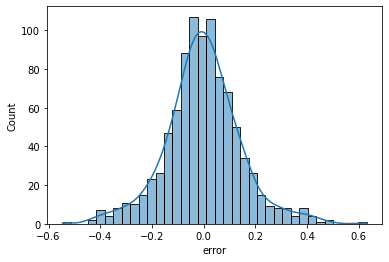

In [68]:
sns.histplot(Train.error,kde=True)

### Errors are normally distributed

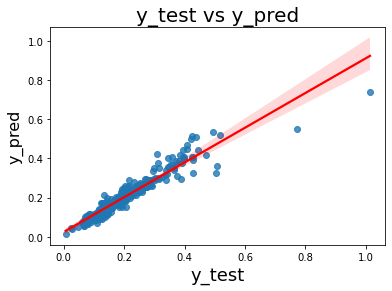

In [69]:
plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
sns.regplot(x=Y_test, y=y_pred, fit_reg=True,line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


## Subjective Questions

### double alpha for ridge and lasso:

In [70]:
0.0001*2

0.0002

#### Ridge (0.7)
#### Lasso (0.0001)

In [71]:
def metrics_double(X_train,X_test,Y_train,Y_test,model):
    model=model
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_train=y_pred_train.reshape(-1)
    y_pred_test=y_pred_test.reshape(-1)
    
    r2_train_lr = r2_score(Y_train, y_pred_train)
    r2_test_lr = r2_score(Y_test, y_pred_test)
    
    rss1_lr = np.sum(np.square(Y_train.values - y_pred_train))
    rss2_lr = np.sum(np.square(Y_test.values - y_pred_test))
    
    mse_train_lr = mean_squared_error(Y_train, y_pred_train)
    mse_test_lr = mean_squared_error(Y_test, y_pred_test)
    
    mae_train=mean_absolute_error(Y_train, y_pred_train)
    mae_test=mean_absolute_error(Y_test,y_pred_test)
    metrics = {
    "Train R2": r2_train_lr,
    "Test R2": r2_test_lr,
    'MAPE R2' : ((r2_test_lr/r2_train_lr)-1)*100,
    "Train RSS": rss1_lr,
    "Test RSS": rss2_lr,
    "Train MSE": mse_train_lr,
    "Test MSE": mse_test_lr,
    'Train MAE':mae_train,
    'Test MAE': mae_test, 
    }
    lr= pd.DataFrame.from_dict(metrics, orient="index", columns=[model])
    return lr

In [72]:
ridge_double=metrics_double(X_train_rfe,X_test_rfe,Y_train,Y_test,Ridge(alpha=1.4))
ridge_double

,Ridge(alpha=1.4)
Train R2,0.906076
Test R2,0.902155
MAPE R2,-0.432668
Train RSS,29999.361714
Test RSS,2098.196991
Train MSE,0.001119
Test MSE,0.001305
Train MAE,0.021019
Test MAE,0.021896


In [73]:
ridge_final=pd.concat([ridge_lr,ridge_double],axis=1)

In [74]:
ridge_final

,Ridge(alpha=0.7),Ridge(alpha=1.4)
Train R2,0.907351,0.906076
Test R2,0.901586,0.902155
MAPE R2,-0.635351,-0.432668
Train RSS,30143.858827,29999.361714
Test RSS,2107.795977,2098.196991
Train MSE,0.001104,0.001119
Test MSE,0.001313,0.001305
Train MAE,0.020811,0.021019
Test MAE,0.022087,0.021896


In [75]:
metrics_double(X_train_rfe,X_test_rfe,Y_train,Y_test,Lasso(alpha=0.0002))

,Lasso(alpha=0.0002)
Train R2,0.897346
Test R2,0.900261
MAPE R2,0.324929
Train RSS,29431.921662
Test RSS,2054.559713
Train MSE,0.001223
Test MSE,0.001330
Train MAE,0.021826
Test MAE,0.021374


In [76]:
def coeff(X_train_rfe,Y_train,model):
    model=model
    model.fit(X_train_rfe,Y_train)
    coeff=pd.DataFrame(index=X_train_rfe.columns)
    coeff.rows=X_train_rfe.columns
    coeff[model]=model.coef_.flatten()
    coeff[model]=np.abs(coeff[model])
    coeff_ten=coeff.sort_values(by=model,ascending=False).head(10)
    return coeff_ten

In [77]:
ridge_old=coeff(X_train_rfe,Y_train,Ridge(0.7))

In [78]:
ridge_new=coeff(X_train_rfe,Y_train,Ridge(1.4))

In [79]:
ridge_coeff=pd.concat([ridge_old,ridge_new],axis=1)
ridge_coeff

,Ridge(alpha=0.7),Ridge(alpha=1.4)
OverallQual_10,0.116150,0.104884
GrLivArea,0.101198,0.095991
2ndFlrSF,0.094090,0.087379
OverallQual_9,0.090075,0.081716
TotalBsmtSF,0.085206,0.076612
1stFlrSF,0.083225,0.079944
OverallCond,0.075873,0.072020
MSZoning_FV,0.056769,NaN
Neighborhood_StoneBr,0.056251,0.054252
YearBuilt,0.053689,0.050089


In [80]:
#lasso

In [81]:
lasso_double=metrics_double(X_train_rfe,X_test_rfe,Y_train,Y_test,Lasso(alpha=0.0002))
lasso_double

,Lasso(alpha=0.0002)
Train R2,0.897346
Test R2,0.900261
MAPE R2,0.324929
Train RSS,29431.921662
Test RSS,2054.559713
Train MSE,0.001223
Test MSE,0.001330
Train MAE,0.021826
Test MAE,0.021374


In [82]:
lasso_final=pd.concat([lasso_lr,lasso_double],axis=1)
lasso_final

,Lasso(alpha=0.0001),Lasso(alpha=0.0002)
Train R2,0.901423,0.897346
Test R2,0.902710,0.900261
MAPE R2,0.142748,0.324929
Train RSS,29817.944239,29431.921662
Test RSS,2082.772905,2054.559713
Train MSE,0.001175,0.001223
Test MSE,0.001298,0.001330
Train MAE,0.021367,0.021826
Test MAE,0.021434,0.021374


In [83]:
lasso_old=coeff(X_train_rfe,Y_train,Lasso(0.0001))

In [84]:
lasso_new=coeff(X_train_rfe,Y_train,Lasso(0.0002))

In [85]:
lasso_coeff=pd.concat([lasso_old,lasso_new],axis=1)
lasso_coeff

,Lasso(alpha=0.0001),Lasso(alpha=0.0002)
GrLivArea,0.254713,0.274772
OverallQual_10,0.121841,0.116109
OverallQual_9,0.094370,0.093355
OverallCond,0.072405,0.062060
TotalBsmtSF,0.065788,0.059435
YearBuilt,0.059613,0.055925
BsmtFinSF1,0.053903,0.053392
Neighborhood_StoneBr,0.050274,0.041017
Neighborhood_NoRidge,0.046812,0.042547
OverallQual_8,0.040477,0.038164


In [86]:
#removing top 5 predictors in lasso

In [87]:
lasso_coeff.index

Index(['GrLivArea', 'OverallQual_10', 'OverallQual_9', 'OverallCond',
       'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1', 'Neighborhood_StoneBr',
       'Neighborhood_NoRidge', 'OverallQual_8'],
      dtype='object')

In [88]:
X_train_rfe_lasso=X_train_rfe.drop(['GrLivArea', 'OverallQual_10', 'OverallQual_9', 'OverallCond','TotalBsmtSF'],axis=1)
X_test_rfe_lasso=X_test_rfe.drop(['GrLivArea', 'OverallQual_10', 'OverallQual_9', 'OverallCond','TotalBsmtSF'],axis=1)

In [89]:
X_train_rfe_lasso.shape

(1155, 95)

In [90]:
X_test_rfe_lasso.shape

(289, 95)

In [91]:
lasso_new=metrics_double(X_train_rfe_lasso,X_test_rfe_lasso,Y_train,Y_test,Lasso(alpha=0.0001))
lasso_new

,Lasso(alpha=0.0001)
Train R2,0.884917
Test R2,0.886066
MAPE R2,0.129901
Train RSS,29548.178014
Test RSS,2108.900019
Train MSE,0.001372
Test MSE,0.001520
Train MAE,0.024234
Test MAE,0.024046


In [92]:
coeff(X_train_rfe_lasso,Y_train,Lasso(0.0001))

,Lasso(alpha=0.0001)
1stFlrSF,0.196159
2ndFlrSF,0.150368
BsmtFinSF1,0.082796
Neighborhood_StoneBr,0.059079
KitchenQual_Fa,0.056797
Neighborhood_NoRidge,0.051545
BsmtQual_Fa,0.050684
KitchenQual_TA,0.048710
BsmtQual_TA,0.048139
GarageArea,0.044692
